<a href="https://colab.research.google.com/github/masterford/ExploratoryDataAnalysis/blob/master/545_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
#this cell holds the import statements
import pandas as pd
# Sqlite is a simplistic database
import sqlite3

import matplotlib.pyplot as plt

!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=9166ccad62afa9c346df002530cef1e8a3a1fd44e77af54a5f8db6ff2044108c
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
#load data into colab
url_list = [] 
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/financial_inclusion_africa_Train_v2.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/financial_inclusion_africa_Test_v2.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/VariableDefinitions.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/VariableDefinitions.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/training.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/test.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/3rd_ppp_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/atm_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/banks_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/bus_stands_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/microfinance_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/pos_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/post_office_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/sacco_for_upload_win.csv")





For the Exploratory section. I'm taking a deep dive into geo spatial data for Tanzania's financial services industry. The main dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey.
The following dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.


In [42]:
#Exploratory Dataframes

#financial access points in Tanzania
tanzania_map_3rd_df = pd.read_csv(url_list[6], encoding = "ISO-8859-1")
tanzania_map_atm_df = pd.read_csv(url_list[7], encoding = "ISO-8859-1")
tanzania_map_banks_df = pd.read_csv(url_list[8], encoding = "ISO-8859-1")
tanzania_map_busStands_df = pd.read_csv(url_list[9], encoding = "ISO-8859-1")
tanzania_map_microfinance_df = pd.read_csv(url_list[10], encoding = "ISO-8859-1")
tanzania_map_momo_agents_df = pd.read_csv(url_list[11], encoding = "ISO-8859-1")
tanzania_map_post_office_df = pd.read_csv(url_list[13], encoding = "ISO-8859-1")

#tanzania_map_3rd_df.head(4)
#anzania_map_atm_df.head(4)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,32,33,42,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Cleaning.


The next step is to clean the data by removing columns we don't need as well as erroneous values 

In [0]:
#This cell should only be run once
tanzania_map_post_office_df = tanzania_map_post_office_df.drop(columns=['post_office_yr_started', 'services_EMS_courier', 'services_philatel'])
tanzania_map_atm_df = tanzania_map_atm_df.drop(columns=['other_services', 'umoja_nmb'])
tanzania_map_busStands_df = tanzania_map_busStands_df.drop(columns=['destination_Arusha', 'destination_Manyara', 'destination_Singida', 'destination_Pwani', 'destination_Mororgoro', 'destination_Iringa', 'destination_Ruvuma', 'destination_Mbeya', 'destination_Rukwa', 'destination_Tanga', 'destination_Kilimanjaro', 
                                        'destination_Tabora', 'destination_Kigoma', 'destination_Dodoma', 'destination_Mwanza', 'destination_Kagera', 'destination_Shiyanga', 'other_services', 'other_services_details'])
tanzania_map_momo_agents_df = tanzania_map_momo_agents_df.drop(columns=['deposits_tigo_pesa', 'withdrawls_tigo_pesa', 'agent_numbers_tigo_pesa', 'tigo_pesa_agent_number1', 'agent_numbers_airtel_cash', 'airtel_cash_agent_number1', 'airtel_cash_agent_number2',
                                                                        'tigo_pesa_agent_number2', 'tigo_pesa_agent_number3', 'tigo_pesa_log_books', 'tigo_pesa_visible_guidance', 'tigo_pesa_visible_guidance_complaints','deposits_airtel_cash', 'withdrawls_airtel_cash',
                                                                        'airtel_cash_agent_number3', 'airtel_cash_log_books'])


In [0]:
#Change Datatypes
tanzania_map_banks_df['yr_started_reformatted'] = tanzania_map_banks_df['yr_started_reformatted'].apply(lambda x : pd.to_datetime(x))
tanzania_map_banks_df['yr_started'] = tanzania_map_banks_df['yr_started'].apply(lambda x : pd.to_datetime(x))

In [154]:
tanzania_map_momo_agents_df.head(5)

,region,district,ward,latitude,longitude,agent_name,till_operator,agent_type,standalone_or_other_business,other_business_type,trading_hours,provider_tigo_pesa,tigo_pesa_balance_your_float,tigo_pesa_training,tigo_pesa_training_type,tigo_pesa_training_tariff_guide,tigo_pesa_most_common_complaint,tigo_pesa_most_common_complaint_detail,provider_airtel_cash,airtel_cash_balance_your_float,airtel_cash_training,airtel_cash_training_type,airtel_cash_training_tariff_guide,airtel_cash_visible_guidance,airtel_cash_visible_guidance_complaints,airtel_cash_most_common_complaint,airtel_cash_most_common_complaint_detail,provider_ezy_pesa,deposits_ezy_pesa,withdrawls_ezy_pesa,agent_numbers_ezy_pesa,ezy_pesa_agent_number1,ezy_pesa_agent_number2,ezy_pesa_agent_number3,ezy_pesa_balance_your_float,ezy_pesa_training,ezy_pesa_training_type,ezy_pesa_training_tariff_guide,ezy_pesa_log_books,ezy_pesa_visible_guidance,...,m_pesa_most_common_complaint,m_pesa_most_common_complaint_detail,top2_utility_accounts_LUKU,top2_utility_accounts_TVsubscription,top2_utility_accounts_purchases,top2_utility_accounts_TRA,top2_utility_accounts_Loans,top2_utility_accounts_insurance,top2_utility_accounts_water,top2_utility_accounts_education,top2_utility_accounts_pension,top2_utility_accounts_DonationsMembership,top2_utility_accounts_travel,top2_utility_accounts_banks,local_facilities_shopping_centre,local_facilities_general_dealer,local_facilities_cafe,local_facilities_salon,local_facilities_pharmacy,local_facilities_bar,local_facilities_wholesaler,local_facilities_electronic_shop,local_facilities_bureau_de_change,local_facilities_hotel,local_facilities_stationary,local_facilities_cellular_shop,local_facilities_grocery_store,local_facilities_duka,local_facilities_restaurant,other_local_services,other_local_services_details,branding_but_no_service,branding_but_no_service_mpesa,branding_but_no_service_tigo_pesa,branding_but_no_service_ezy_pesa,branding_but_no_service_airtel_money,branding_but_no_service_max_malipo,branding_but_no_service_selcom,branding_but_no_service_button Pay,latlong
0,Ruvuma,Tunduru,Kalulu,-10.28298,40.18363,Yusuph Shop,employee,Aggregated,Standalone agent,NaN,12 hours,Yes,Super agents,Yes,Training from other MM rep,Yes,Support from Call Center (No support),NaN,Yes,Super agents,Yes,Formal classroom training,Yes,Yes,No,Network Availability (No coverage),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"-10.28298,40.18363"
1,Ruvuma,Tunduru,Kalulu,-10.28457,40.18295,Abdulazak Shop,owner,Aggregated,Other business,Duka,12 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Aggregator,Yes,Training from other MM rep,No,Yes,No,Network Availability (No coverage),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-10.28457,40.18295"
2,Kilimanjaro,Moshi Urban,Bondeni,-3.36025,37.33803,Hussein Ramadhani Shop,employee,Independent,Standalone agent,NaN,12 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Banks,Yes,Training from other MM rep,Yes,Yes,Yes,System isssues (Network stability),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-3.36025,37.338029999999996"
3,Dar es Salaam,Kinondoni,Manzese,-6.80213,39.22978,Mechmaster Ltd,employee,Aggregated,Standalone agent,NaN,12 hours,Yes,Super agents,Yes,Training from other MM rep,Yes,Network Availability (No coverage),NaN,Yes,Banks,Yes,Training from other MM rep,Yes,Yes,Yes,Network Availability (No coverage),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Network Availability (No coverage),NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [61]:
tanzania_map_atm_df.head(5)

,region,district,ward,latitude,longitude,onsite_offsite,bank_type,bank_name,bank_name_short,yr_operation_started,number_atms,services_deposits,services_withdrawls,services_bill_payment,services_buy_airtime,visa_mastercard
0,Dar es Salaam,Ilala,Kariakoo,-6.82175,39.28000,On-site,Commercial Bank ATM,Accessbank (Tanzania) Limited,Access,11/12/2003,1,NaN,Yes,NaN,NaN,Both
1,Dar es Salaam,Ilala,Kariakoo,-6.81967,39.27322,On-site,UMOJA SWITCH ATM,Accessbank (Tanzania) Limited,Access,09/01/2014,1,NaN,Yes,NaN,NaN,VISA
2,Dar es Salaam,Kinondoni,Manzese,-6.80376,39.26055,On-site,Commercial Bank ATM,Accessbank (Tanzania) Limited,Access,07/05/2010,1,NaN,Yes,NaN,NaN,VISA
3,Dar es Salaam,Kinondoni,Makumbusho,-6.77668,39.24587,On-site,Commercial Bank ATM,Accessbank (Tanzania) Limited,Access,17/11/2011,1,NaN,Yes,NaN,NaN,Mastercard
4,Tabora,Tabora Urban,Kanyenye,-5.02275,32.80941,On-site,Commercial Bank ATM,Accessbank (Tanzania) Limited,Access,18/12/2013,2,Yes,Yes,Yes,Yes,Both


In [62]:
tanzania_map_banks_df.head(5)

,region,district,ward,latitude,longitude,bank_type,bank_name,weekend_trading,yr_started,yr_started_reformatted
0,Dar es Salaam,Temeke,Mbagala,-6.92247,39.27113,Commercial Bank,Accessbank (Tanzania) Limited,Yes,16/05/11,2011-5-01
1,Shinyanga,Kahama,Kahama Mjini,-3.82858,32.60006,Commercial Bank,Accessbank (Tanzania) Limited,No,12/07/13,2013-7-01
2,Dar es Salaam,Temeke,Miburani,-6.86209,39.26233,Commercial Bank,Accessbank (Tanzania) Limited,Yes,05/03/98,1998-3-01
3,Dar es Salaam,Ilala,Kariakoo,-6.82157,39.28025,Commercial Bank,Accessbank (Tanzania) Limited,Yes,10/06/09,2009-6-01
4,Dar es Salaam,Ilala,Kariakoo,-6.81944,39.27418,Commercial Bank,Accessbank (Tanzania) Limited,Yes,18/12/13,2013-12-01


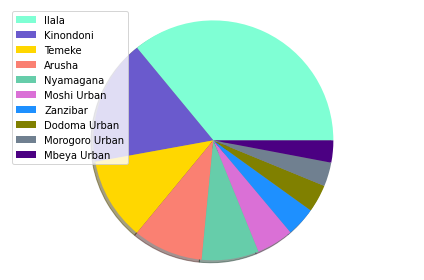

35.98014888337469 16.87344913151365 11.166253101736972 9.429280397022332


In [102]:
#Get bank information in Tanzania by district
conn = sqlite3.connect('local.db')

tanzania_map_banks_df.to_sql("tanzania_banks", conn, if_exists="replace", index=False)

district_bank_count_df = pd.read_sql_query('select district, COUNT(district) AS total  from tanzania_banks GROUP BY district ORDER BY total desc LIMIT 10', conn)

#plot
labels = district_bank_count_df['district'].tolist()
sizes = district_bank_count_df['total'].tolist()
colors = ['aquamarine','slateblue','gold','salmon','mediumaquamarine','orchid','dodgerblue','olive','slategrey','indigo']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#Get statistics
sizes.sort
total = sum(sizes)
llana = (sizes[0]/total) * 100
Kinondoni = (sizes[1]/total) * 100
Temeke = (sizes[2] / total) *100
Arusha = (sizes[3] / total) * 100

print(llana, Kinondoni, Temeke, Arusha)

In [101]:
print(sizes)

[145, 68, 45, 38, 31, 20, 16, 15, 13, 12]


In [0]:
#Show changes in number of banks over time
tanzania_map_banks_df.dtypes

#tanzania_map_banks_df.to_sql("tanzania_banks_date", conn, if_exists="replace", index=False)
last_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
         >= "2000-01-01" AND yr_started_reformatted <= "2010-12-31" ''', conn)

current_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
         >= "2010-01-01" ''', conn)

ninetys_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
                                        <= "2000-01-01" ''', conn)

In [91]:
shape_last = last_decade_df.shape
shape_current = current_decade_df.shape
shape_ninety = ninetys_decade_df.shape
print(shape_current, shape_last, shape_ninety)

(299, 10) (226, 10) (121, 10)


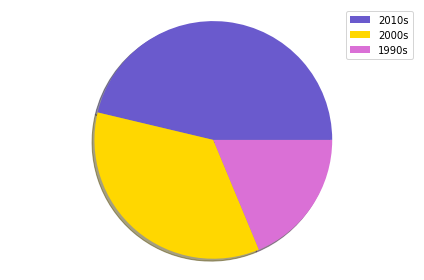

46.28482972136223 34.984520123839005 18.730650154798763


In [103]:
#plot
labels = ['2010s', '2000s', '1990s']
sizes = [shape_current[0], shape_last[0], shape_ninety[0]]
colors = ['slateblue','gold', 'orchid']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#statistics
sizes.sort
total = sum(sizes)
current = (sizes[0]/total) * 100
last = (sizes[1]/total) * 100
ninety = (sizes[2]/total) * 100
print(current, last, ninety)

Using the latitude and longitude columns in the dataset, I can now merge tables with via location as the unique column. To do this, I will first need to convert latitude, longitude into a suitable location object

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="CIS_545")

def get_zipcode(latlong):
  location = geolocator.reverse(latlong)
  return location.raw['address']['postcode']

def get_address(latlong):
  location = geolocator.reverse(latlong)
  return location.raw['address']

def get_raw(latlong):
  location = geolocator.reverse(latlong)
  return location.raw

In [118]:
get_zipcode("40.64749,-73.97237") #test

'11218'

In [119]:
get_address("-6.92247,39.27113") #test

{'city': 'Dar es Salaam',
 'country': 'Tanzania',
 'country_code': 'tz',
 'region': 'Coastal Zone',
 'road': 'T7',
 'suburb': 'Mbagala'}

In [126]:
get_raw("-6.92247,39.27113") #test


{'address': {'city': 'Dar es Salaam',
  'country': 'Tanzania',
  'country_code': 'tz',
  'region': 'Coastal Zone',
  'road': 'T7',
  'suburb': 'Mbagala'},
 'boundingbox': ['-6.9298001', '-6.9217452', '39.2709947', '39.2720014'],
 'display_name': 'T7, Mbagala, Dar es Salaam, Coastal Zone, Tanzania',
 'lat': '-6.922477043195939',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '39.271032996350755',
 'osm_id': 344978252,
 'osm_type': 'way',
 'place_id': 166852212}

In [0]:
#Add unique column based on latitude, longitude
#This cell takes quite a bit of time to run

tanzania_map_banks_df
tanzania_map_banks_df['latlong'] = tanzania_map_banks_df.apply(lambda row: '{},{}'.format(row['latitude'], #temp column
row['longitude']), axis=1)

tanzania_map_banks_df['address_name'] = tanzania_map_banks_df['latlong'].apply(lambda x: get_raw(x)['display_name']).astype(str)
tanzania_map_banks_df['place_id'] = tanzania_map_banks_df['latlong'].apply(lambda x: get_raw(x)['place_id']).astype(str)

tanzania_map_banks_df = tanzania_map_banks_df.drop(['latlong'], axis=1)

#tanzania_map_atm_df
tanzania_map_atm_df['latlong'] = tanzania_map_atm_df.apply(lambda row: '{},{}'.format(row['latitude'], #temp column
row['longitude']), axis=1)

tanzania_map_atm_df['address_name'] = tanzania_map_atm_df['latlong'].apply(lambda x: get_raw(x)['display_name']).astype(str)
tanzania_map_atm_df['place_id'] = tanzania_map_atm_df['latlong'].apply(lambda x: get_raw(x)['place_id']).astype(str)

tanzania_map_atm_df = tanzania_map_atm_df.drop(['latlong'], axis=1)

#tanzania_map_momo_agents_df
tanzania_map_momo_agents_df['latlong'] = tanzania_map_momo_agents_df.apply(lambda row: '{},{}'.format(row['latitude'], #temp column
row['longitude']), axis=1)

tanzania_map_momo_agents_df['address_name'] = tanzania_map_momo_agents_df['latlong'].apply(lambda x: get_raw(x)['display_name']).astype(str)
tanzania_map_momo_agents_df['place_id'] = tanzania_map_momo_agents_df['latlong'].apply(lambda x: get_raw(x)['place_id']).astype(str)

tanzania_map_momo_agents_df = tanzania_map_momo_agents_df.drop(['latlong'], axis=1)

#tanzania_map_microfinance_df
#tanzania_map_busStands_df


Time to join the different tables based on the newly created location object

In [148]:
import pandasql
merge_bank_df = pandasql.sqldf("SELECT * FROM tanzania_map_atm_df INNER JOIN tanzania_map_banks_df ON tanzania_map_atm_df.place_id = tanzania_map_banks_df.place_id;", globals());
merge_bank_df = merge_bank_df.drop(columns=['yr_started', 'yr_started_reformatted'])
merge_bank_df = merge_bank_df.loc[:,~merge_bank_df.columns.duplicated()]

merge_bank_df = merge_bank_df.set_index('place_id')
merge_bank_df = merge_bank_df.drop_duplicates()

print(tanzania_map_atm_df.shape, tanzania_map_banks_df.shape, merge_bank_df.shape)
merge_bank_df.head(5)

(975, 18) (616, 12) (337, 18)


,region,district,ward,latitude,longitude,onsite_offsite,bank_type,bank_name,bank_name_short,yr_operation_started,number_atms,services_deposits,services_withdrawls,services_bill_payment,services_buy_airtime,visa_mastercard,address_name,weekend_trading
place_id,,,,,,,,,,,,,,,,,,
140387384,Tabora,Tabora Urban,Kanyenye,-5.02275,32.80941,On-site,Commercial Bank ATM,Accessbank (Tanzania) Limited,Access,18/12/2013,2,Yes,Yes,Yes,Yes,Both,"Ipuli Ward, Tabora, Tabora Muncipal, Tabora, C...",Yes
232504553,Dar es Salaam,Ilala,Kariakoo,-6.81950,39.27768,On-site,Commercial Bank ATM,Advans Bank (Tanzania) Limited,Advans,11/08/2009,1,None,Yes,None,None,Both,"Kariakoo, Dar es Salaam, Coastal Zone, 00000, ...",Yes
184304088,Dar es Salaam,Ilala,Ukonga,-6.87068,39.19028,On-site,Commercial Bank ATM,Akiba Commercial Bank Limited,Akiba,28/08/1996,1,Yes,Yes,Yes,Yes,Both,"Kipawa, Dar es Salaam, Coastal Zone, 17503, Ta...",Yes
207695342,Mwanza,Geita,Kalangala,-2.87066,32.23779,On-site,UMOJA SWITCH ATM,Azania Bank Limited,Azania,17/01/2008,2,Yes,None,None,None,VISA,"T4, Sengerema, Mwanza, Lake Zone, 3003, Tanzania",Yes
131469028,Mwanza,Ilemela,Kirumba,-2.50632,32.89476,On-site,Commercial Bank ATM,Azania Bank Limited,Azania,27/03/2010,1,None,Yes,None,None,VISA,"Kirumba Fish Market, Mwaloni road, Ibanda, Kir...",Yes


In [151]:
bank_types_df = pandasql.sqldf('select bank_type, COUNT(bank_type) AS total  from merge_bank_df GROUP BY bank_type ORDER BY total desc LIMIT 10', globals())

bank_types_df

,bank_type,total
0,Commercial Bank ATM,283
1,UMOJA SWITCH ATM,42
2,Community Bank ATM,12


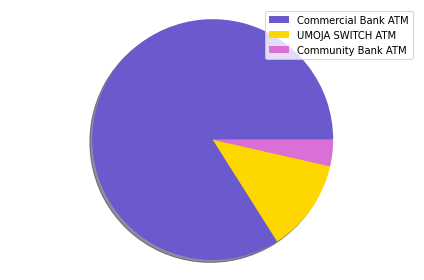

83.97626112759644 12.462908011869436 3.5608308605341246


In [153]:
#plot
labels = ['Commercial Bank ATM', 'UMOJA SWITCH ATM', 'Community Bank ATM']
sizes = [283, 42, 12]
colors = ['slateblue','gold', 'orchid']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#statistics
sizes.sort
total = sum(sizes)
commercial_bank = (sizes[0]/total) * 100
umoja_switch_ATM = (sizes[1]/total) * 100
community_bank_atm = (sizes[2]/total) * 100
print(commercial_bank, umoja_switch_ATM, community_bank_atm)

Now that we have an idea of the state of financial services in Tanzania. I will use the insights gathered to classify each individual into four mutually exclusive categories:

 No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance

 Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)

 Mm_only: Individuals who use mobile money only
 
 Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

In [0]:
#Modelling Dataframes
financial_incl_train_df = pd.read_csv(url_list[0])



In [0]:
financial_incl_train_df.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
